In [3]:
import os
from cnn import CNN
from transform_color_space import transform_images
import warnings
warnings.filterwarnings("ignore")
os.getcwd()

'C:\\Users\\andres.vargas\\OneDrive - IGNIS ENERGIA, S.L\\Documentos\\andres.vargas\\05. MASTER AI\\03. Computer Vision\\PoC_Imagenes(V1)\\esquema_reconocimiento_imagenes'

# Objetive
The problem to be solved is a real-world issue in which the goal is to detect faults in solar panels through the analysis of thermographs (and a problem that now we have in my job). To achieve this, the images with faults and those without faults have been separated, and a transfer learning process has been conducted using a ResNet50 neural network (the Classes and Functions have tips)

# TRAIN

After many iterations and changes in the CNN, the best results were achieved by unfreezing all the neurons in the ResNet50 architecture and applying a three-layer densely connected recurrent neural network (RNN). Regularization techniques were used to reduce overfitting, including the use of dropout.
- The best classification results is using the parameters that we have here:



Reading training and validation data...
Found 158 images belonging to 2 classes.
Found 41 images belonging to 2 classes.


Model summary
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 2048)              4196352   
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 2048)              4196352   
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 1536)        

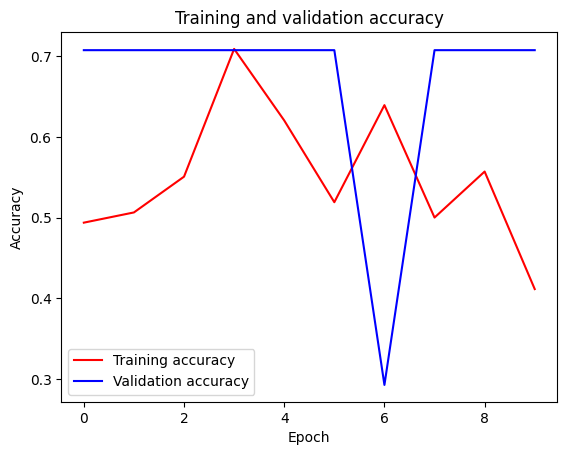

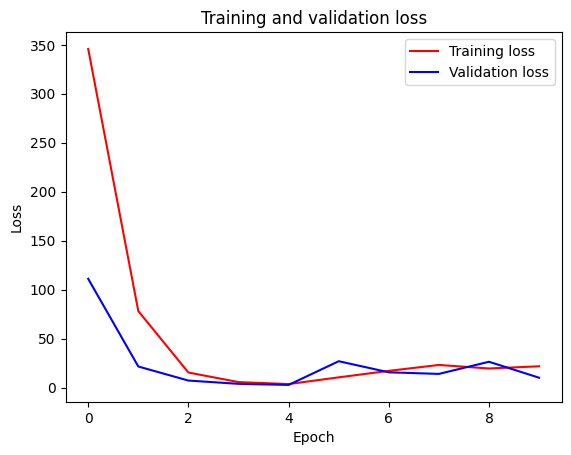

In [5]:
training_dir = 'strings/train'
validation_dir = 'strings/validation'

cnn = CNN()
bm = 'ResNet50'
epochs = 89
lr = 1e-2
beta_1 = 0.3
cnn.train(training_dir, validation_dir, base_model=bm, epochs=epochs, learning_rate = lr, 
          training_batch_size=64, validation_batch_size=64, beta_1=beta_1, epsilon=1e-5)
cnn.save(f'{bm}_{epochs}_{lr}_{beta_1}')

# PREDICT

In [6]:
print(f'{bm}_{epochs}_{lr}_{beta_1}')
cnn.load(f'{bm}_{epochs}_{lr}_{beta_1}')
# El mejor modelo hasta ahora es el ResNet50_89_0.0001_0.3


#
cnn.predict("training", training_dir, save= True)
cnn.predict("validation", validation_dir,save = True)

ResNet50_10_0.01_0.3
Reading test data...
Found 158 images belonging to 2 classes.
158/158 [==============================] - 6s 25ms/step
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


CLASSIFICATION RESULTS

Confusion matrix

KNOWN/PREDICTED  defect  no-defect
defect              0.0       46.0
no-defect           0.0      112.0

Accuracy:  0.7088607594936709
training
Reading test data...
Found 41 images belonging to 2 classes.
41/41 [==============================] - 1s 26ms/step
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 